In [ ]:
!pip install numpy

In [ ]:
!pip install tensorflow

In [ ]:
!pip install kaggle

In [ ]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [5]:
import os
import json
from zipfile import ZipFile
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
# Path to the dataset via Kaggle API
dataset_path = "/kaggle/input/plantvillage-dataset"

# Checking what’s inside
print(os.listdir(dataset_path))


['segmented', 'grayscale', 'plantvillage dataset', 'color']


In [ ]:
# Full path to the main folder
dataset_dir = "/kaggle/input/plantvillage-dataset"

# List what's inside
print(os.listdir(dataset_dir))

# Segmented
segmented_path = os.path.join(dataset_dir, "segmented")
print("Segmented:", len(os.listdir(segmented_path)))
print(os.listdir(segmented_path)[:5])

# Color
color_path = os.path.join(dataset_dir, "color")
print("Color:", len(os.listdir(color_path)))
print(os.listdir(color_path)[:5])

# Grayscale
gray_path = os.path.join(dataset_dir, "grayscale")
print("Grayscale:", len(os.listdir(gray_path)))
print(os.listdir(gray_path)[:5])


['segmented', 'grayscale', 'plantvillage dataset', 'color']
Segmented: 38
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy']
Color: 38
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy']
Grayscale: 38
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy']


In [ ]:
import os

# Full path to the main folder
dataset_dir = "/kaggle/input/plantvillage-dataset"

# Listing what's inside
print(os.listdir(dataset_dir))

# Segmented
segmented_path = os.path.join(dataset_dir, "segmented")
print("Segmented:", len(os.listdir(segmented_path)))
print(os.listdir(segmented_path)[:5])

# Color
color_path = os.path.join(dataset_dir, "color")
print("Color:", len(os.listdir(color_path)))
print(os.listdir(color_path)[:5])

# Grayscale
gray_path = os.path.join(dataset_dir, "grayscale")
print("Grayscale:", len(os.listdir(gray_path)))
print(os.listdir(gray_path)[:5])


['segmented', 'grayscale', 'plantvillage dataset', 'color']
Segmented: 38
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy']
Color: 38
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy']
Grayscale: 38
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy']


In [ ]:

# Path to the 'color' class folder
grape_healthy_path = os.path.join(dataset_dir, "color", "Grape___healthy")

# Number of images
print(len(os.listdir(grape_healthy_path)))

# Preview first 5 images
print(os.listdir(grape_healthy_path)[:5])


423
['71af6c2b-b3ed-4629-8aaa-7b60187caee1___Mt.N.V_HL 9069.JPG', '244804b5-05e2-4372-a376-36a0655aff41___Mt.N.V_HL 6121.JPG', '4b266fb8-a762-4073-a9e2-25a3861115c4___Mt.N.V_HL 6152.JPG', '4bd0c235-94b2-4d5d-a76e-58df595e7802___Mt.N.V_HL 6032.JPG', '12331981-d038-4eb0-a1c6-64b27f226cab___Mt.N.V_HL 6106.JPG']


## Data Exploration

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter
from pathlib import Path


In [11]:
from pathlib import Path

# Base path to the dataset
base_dir = Path("/kaggle/input/plantvillage-dataset/color")
data_dir = base_dir

# List classes
classes = [d.name for d in data_dir.iterdir() if d.is_dir()]
print("Classes:", classes)

# Number of images in first class
first_class = classes[0]
first_class_path = data_dir / first_class
print("Number of images in", first_class, ":", len(list(first_class_path.iterdir())))

# Preview first 5 images
print(list(first_class_path.iterdir())[:5])


Classes: ['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___Leaf_Mold', 

In [ ]:
def explore_dataset(dataset_path):
    """
    Analyse la structure du dataset
    """
    classes = []
    image_counts = []

    # Parcourir tous les dossiers de classes
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            classes.append(class_name)
            image_counts.append(num_images)

    # Créer un DataFrame pour l'analyse
    df = pd.DataFrame({
        'Classe': classes,
        'Nombre_Images': image_counts
    })

    print(f"📊 Statistiques du Dataset:")
    print(f"Nombre total de classes : {len(classes)}")
    print(f"les différentes classes: {classes}")
    print(f"Nombre total d'images : {sum(image_counts)}")
    print(f"Moyenne d'images par classe : {np.mean(image_counts):.0f}")
    print(f"Min images par classe : {min(image_counts)}")
    print(f"Max images par classe : {max(image_counts)}")

    return df



In [13]:
# Visualisation de la distribution
def visualize_distribution(df):
    """
    Visualise la distribution des classes
    """
    plt.figure(figsize=(20, 8))
    plt.bar(range(len(df)), df['Nombre_Images'])
    plt.xlabel('Classes', fontsize=12)
    plt.ylabel('Nombre d\'images', fontsize=12)
    plt.title('Distribution des images par classe', fontsize=14)
    plt.xticks(range(len(df)), df['Classe'], rotation=90)
    plt.tight_layout()
    plt.savefig('distribution_classes.png', dpi=300, bbox_inches='tight')
    plt.show()

In [14]:
# Visualisation d'échantillons
def visualize_samples(dataset_path, num_classes=6, samples_per_class=3):
    """
    Affiche des échantillons d'images pour quelques classes
    """
    classes = os.listdir(dataset_path)[:num_classes]

    fig, axes = plt.subplots(num_classes, samples_per_class,
                             figsize=(15, num_classes*3))

    for i, class_name in enumerate(classes):
        class_path = os.path.join(dataset_path, class_name)
        images = os.listdir(class_path)[:samples_per_class]

        for j, img_name in enumerate(images):
            img_path = os.path.join(class_path, img_name)
            img = Image.open(img_path)

            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(class_name, fontsize=10)

    plt.tight_layout()
    plt.savefig('echantillons_images.png', dpi=300, bbox_inches='tight')
    plt.show()

📊 Statistiques du Dataset:
Nombre total de classes : 38
les différentes classes: ['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grap

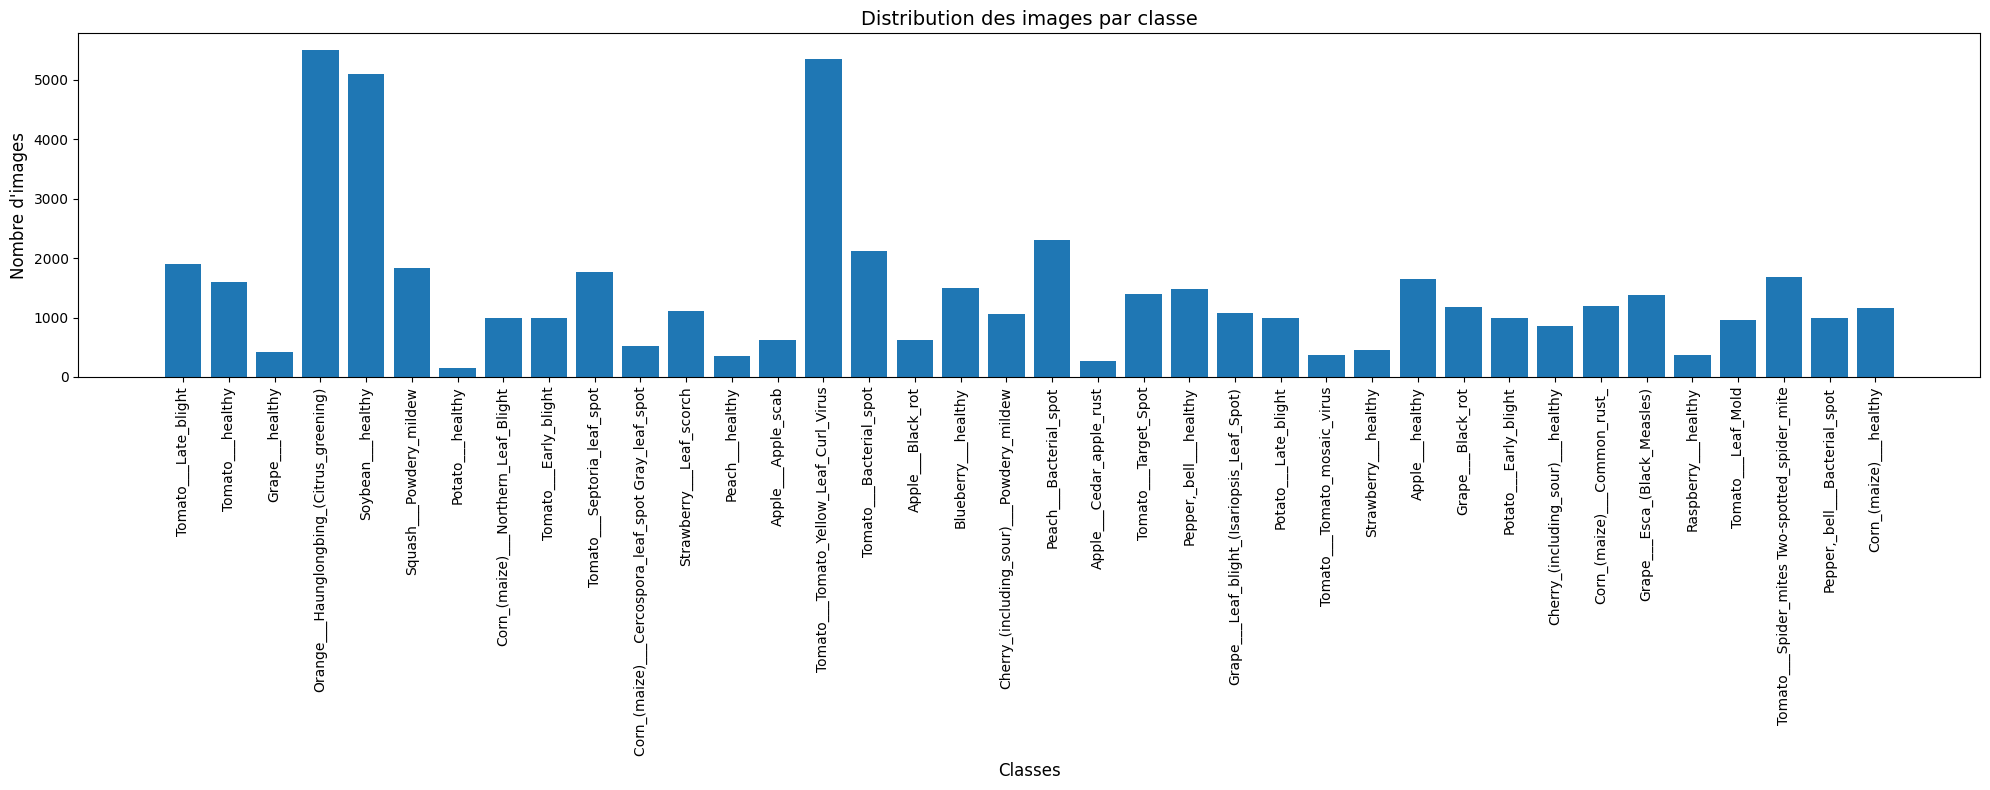

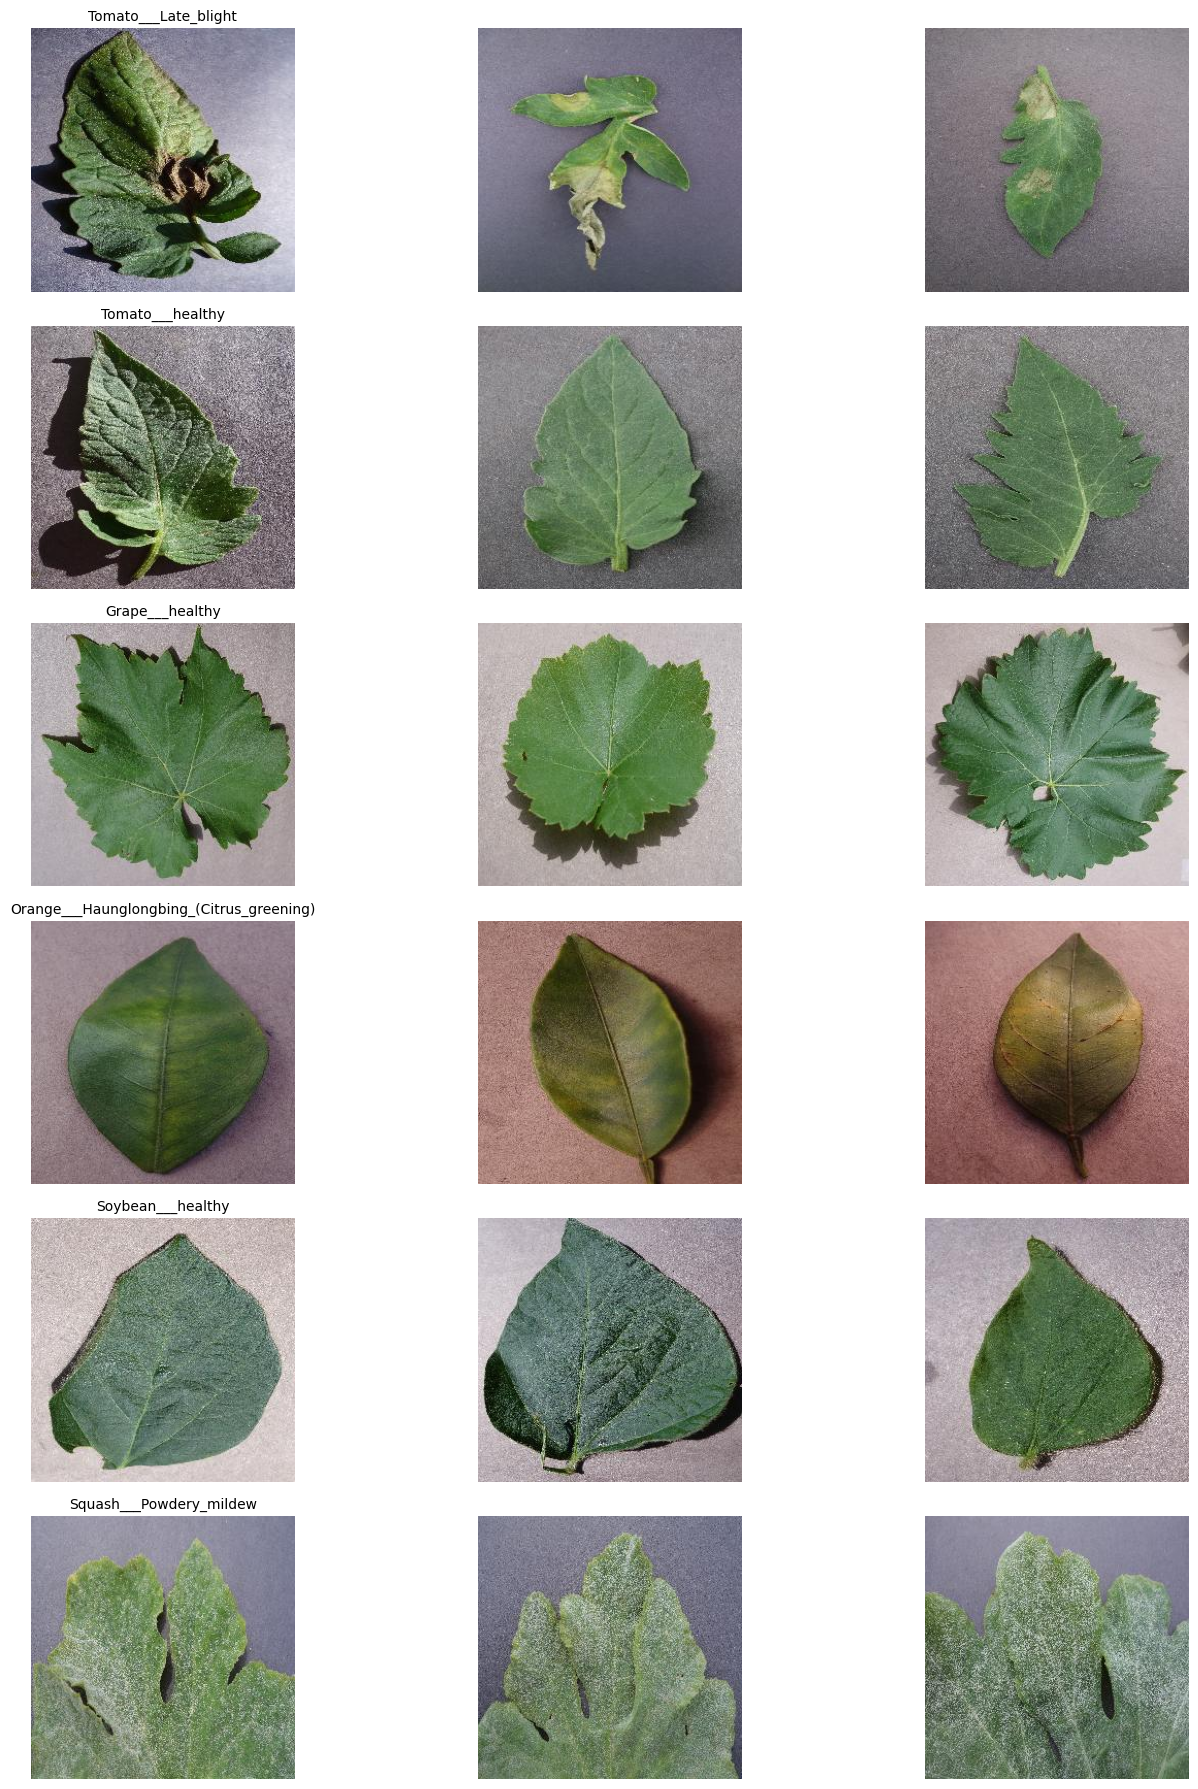

In [15]:
# Exécution de l'exploration
df = explore_dataset(data_dir)
visualize_distribution(df)
visualize_samples(data_dir)

In [16]:
classes = sorted(os.listdir(data_dir))
print(f"Nombre total de classes : {len(classes)}")

# Compter les images dans chaque classe
counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in classes}

Nombre total de classes : 38


In [17]:
#Nombre d'images par classe (10 les plus grandes et les plus petites)
from pprint import pprint
pprint(sorted(counts.items(), key=lambda x: -x[1])[:10])  # 10 classes les plus grandes
pprint(sorted(counts.items(), key=lambda x: x[1])[:10])   # 10 classes les plus petites


[('Orange___Haunglongbing_(Citrus_greening)', 5507),
 ('Tomato___Tomato_Yellow_Leaf_Curl_Virus', 5357),
 ('Soybean___healthy', 5090),
 ('Peach___Bacterial_spot', 2297),
 ('Tomato___Bacterial_spot', 2127),
 ('Tomato___Late_blight', 1909),
 ('Squash___Powdery_mildew', 1835),
 ('Tomato___Septoria_leaf_spot', 1771),
 ('Tomato___Spider_mites Two-spotted_spider_mite', 1676),
 ('Apple___healthy', 1645)]
[('Potato___healthy', 152),
 ('Apple___Cedar_apple_rust', 275),
 ('Peach___healthy', 360),
 ('Raspberry___healthy', 371),
 ('Tomato___Tomato_mosaic_virus', 373),
 ('Grape___healthy', 423),
 ('Strawberry___healthy', 456),
 ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 513),
 ('Apple___Black_rot', 621),
 ('Apple___Apple_scab', 630)]


In [18]:
#Vérification de la qualité et la cohérence des images
from PIL import Image

bad_images = []
for cls in classes:
    cls_dir = os.path.join(data_dir, cls)
    for fname in os.listdir(cls_dir):
        fpath = os.path.join(cls_dir, fname)
        try:
            img = Image.open(fpath)
            img.verify()  # vérifie la validité
        except Exception as e:
            bad_images.append(fpath)
print(f"Images corrompues détectées : {len(bad_images)}")


Images corrompues détectées : 0


In [19]:
sizes = []
for cls in random.sample(classes, 10):  # on teste 10 classes
    for f in random.sample(os.listdir(os.path.join(data_dir, cls)), 5):
        path = os.path.join(data_dir, cls, f)
        img = Image.open(path)
        sizes.append(img.size)

sizes = np.array(sizes)
print("Moyenne des largeurs:", np.mean(sizes[:,0]))
print("Moyenne des hauteurs:", np.mean(sizes[:,1]))


Moyenne des largeurs: 256.0
Moyenne des hauteurs: 256.0


## Data Preprocessing


In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# Configuration
IMG_SIZE = 224  # Taille standard pour les modèles pré-entraînés
BATCH_SIZE = 32
EPOCHS = 20
NUM_CLASSES = 38

# Création des générateurs de données avec augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalisation des pixels [0,1]
    rotation_range=20,           # Rotation aléatoire
    width_shift_range=0.2,       # Décalage horizontal
    height_shift_range=0.2,      # Décalage vertical
    shear_range=0.2,             # Cisaillement
    zoom_range=0.2,              # Zoom
    horizontal_flip=True,        # Miroir horizontal
    fill_mode='nearest',         # Remplissage des pixels manquants
    validation_split=0.2         # 20% pour la validation
)

# Générateur pour le test (pas d'augmentation)
test_datagen = ImageDataGenerator(
    rescale=1./255
)

# Chargement des données d'entraînement
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Chargement des données de validation
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

print(f"Données chargées ✅ :")
print(f"   Training samples: {train_generator.samples}")
print(f"   Validation samples: {validation_generator.samples}")
print(f"   Number of classes: {train_generator.num_classes}")

Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.
Données chargées ✅ :
   Training samples: 43456
   Validation samples: 10849
   Number of classes: 38


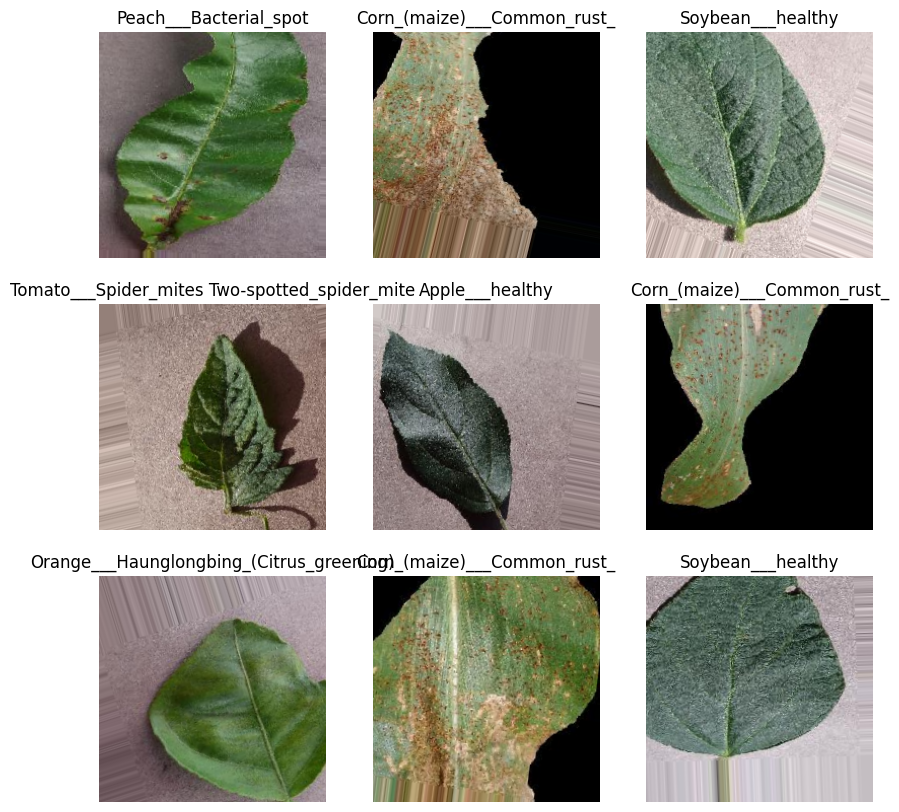

In [22]:
import matplotlib.pyplot as plt

x_batch, y_batch = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_batch[i])
    plt.title(list(train_generator.class_indices.keys())[y_batch[i].argmax()])
    plt.axis("off")
plt.show()

## Deep learning models

In [23]:
# Create directories
os.makedirs('models', exist_ok=True)
os.makedirs('plots', exist_ok=True)

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2, ResNet50, VGG16
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# ===========================
# UTILITY FUNCTIONS
# ===========================

def get_callbacks(model_name):
    """Define training callbacks"""
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True,
            verbose=1
        ),
        ModelCheckpoint(
            f'models/{model_name}_best.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=1e-7,
            verbose=1
        )
    ]
    return callbacks

def plot_training_history(history, model_name):
    """Plot training and validation metrics"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Accuracy
    axes[0, 0].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
    axes[0, 0].plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
    axes[0, 0].set_title(f'{model_name} - Accuracy', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Loss
    axes[0, 1].plot(history.history['loss'], label='Train Loss', linewidth=2)
    axes[0, 1].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
    axes[0, 1].set_title(f'{model_name} - Loss', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Precision
    axes[1, 0].plot(history.history['precision'], label='Train Precision', linewidth=2)
    axes[1, 0].plot(history.history['val_precision'], label='Val Precision', linewidth=2)
    axes[1, 0].set_title(f'{model_name} - Precision', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # Recall
    axes[1, 1].plot(history.history['recall'], label='Train Recall', linewidth=2)
    axes[1, 1].plot(history.history['val_recall'], label='Val Recall', linewidth=2)
    axes[1, 1].set_title(f'{model_name} - Recall', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Recall')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'plots/{model_name}_training_history.png', dpi=300, bbox_inches='tight')
    plt.show()


def evaluate_model(model, validation_generator, model_name):
    """Evaluate model and print metrics"""
    print(f"\n{'='*60}")
    print(f"EVALUATING {model_name}")
    print(f"{'='*60}\n")

    results = model.evaluate(validation_generator, verbose=1)

    print(f"\n📊 Final Metrics for {model_name}:")
    print(f"   Loss:      {results[0]:.4f}")
    print(f"   Accuracy:  {results[1]:.4f}")
    print(f"   Precision: {results[2]:.4f}")
    print(f"   Recall:    {results[3]:.4f}")
    print(f"   F1-Score:  {2 * (results[2] * results[3]) / (results[2] + results[3]):.4f}")

    return results


In [ ]:
# ===========================
# BASELINE CNN ARCHITECTURE
# ===========================

def build_baseline_cnn(input_shape=(IMG_SIZE, IMG_SIZE, 3), num_classes=NUM_CLASSES):
    """
    Build a custom CNN from scratch
    Architecture: 4 Conv blocks + Dense layers
    """
    model = models.Sequential([
        # Block 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                     input_shape=input_shape, name='conv1_1'),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1_2'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Block 2
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2_1'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2_2'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Block 3
        layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3_1'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3_2'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Block 4
        layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='conv4_1'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='conv4_2'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Dense layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

In [ ]:
# ===========================
# BUILD AND COMPILE BASELINE CNN
# ===========================

print("\n" + "="*60)
print("BUILDING BASELINE CUSTOM CNN")
print("="*60 + "\n")

baseline_model = build_baseline_cnn()

# Compile model
baseline_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy',
            keras.metrics.Precision(name='precision'),
            keras.metrics.Recall(name='recall')]
)

print(baseline_model.summary())
print(f"\n📊 Model Statistics:")
print(f"   Total parameters: {baseline_model.count_params():,}")
print(f"   Trainable parameters: {sum([tf.size(w).numpy() for w in baseline_model.trainable_weights]):,}")



BUILDING BASELINE CUSTOM CNN



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1760780584.507619      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1_1 (Conv2D)                │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_2 (Conv2D)                │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_1 (Conv2D)                │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_2 (Conv2D)                │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_1 (Conv2D)                │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_2 (Conv2D)                │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4_1 (Conv2D)                │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4_2 (Conv2D)                │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 27,010,886 (103.04 MB)

 Trainable params: 27,007,430 (103.03 MB)

 Non-trainable params: 3,456 (13.50 KB)

None

📊 Model Statistics:
   Total parameters: 27,010,886
   Trainable parameters: 27,007,430


In [ ]:
# ===========================
# TRAIN BASELINE CNN
# ===========================

print("\n" + "="*60)
print("TRAINING BASELINE CNN")
print("="*60 + "\n")

baseline_callbacks = get_callbacks('baseline_cnn')

baseline_history = baseline_model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=baseline_callbacks,
    verbose=1
)

print("\n✅ Baseline CNN training completed!")


TRAINING BASELINE CNN



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1760780597.192279     129 service.cc:148] XLA service 0x7b5b3800a100 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760780597.193058     129 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1760780598.239228     129 cuda_dnn.cc:529] Loaded cuDNN version 90300


   2/1358 ━━━━━━━━━━━━━━━━━━━━ 1:54 85ms/step - accuracy: 0.0391 - loss: 5.5059 - precision: 0.0000e+00 - recall: 0.0000e+00  

I0000 00:00:1760780612.526291     129 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.3918 - loss: 2.4298 - precision: 0.6211 - recall: 0.2710
Epoch 1: val_accuracy improved from -inf to 0.55784, saving model to models/baseline_cnn_best.h5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 629s 444ms/step - accuracy: 0.3919 - loss: 2.4293 - precision: 0.6212 - recall: 0.2711 - val_accuracy: 0.5578 - val_loss: 1.4745 - val_precision: 0.7324 - val_recall: 0.4599 - learning_rate: 0.0010
Epoch 2/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.6925 - loss: 1.0118 - precision: 0.8107 - recall: 0.5913
Epoch 2: val_accuracy improved from 0.55784 to 0.70854, saving model to models/baseline_cnn_best.h5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 611s 450ms/step - accuracy: 0.6926 - loss: 1.0117 - precision: 0.8107 - recall: 0.5913 - val_accuracy: 0.7085 - val_loss: 1.0703 - val_precision: 0.7657 - val_recall: 0.6686 - learning_rate: 0.0010
Epoch 3/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.7938 - loss: 0.6564 - precision:

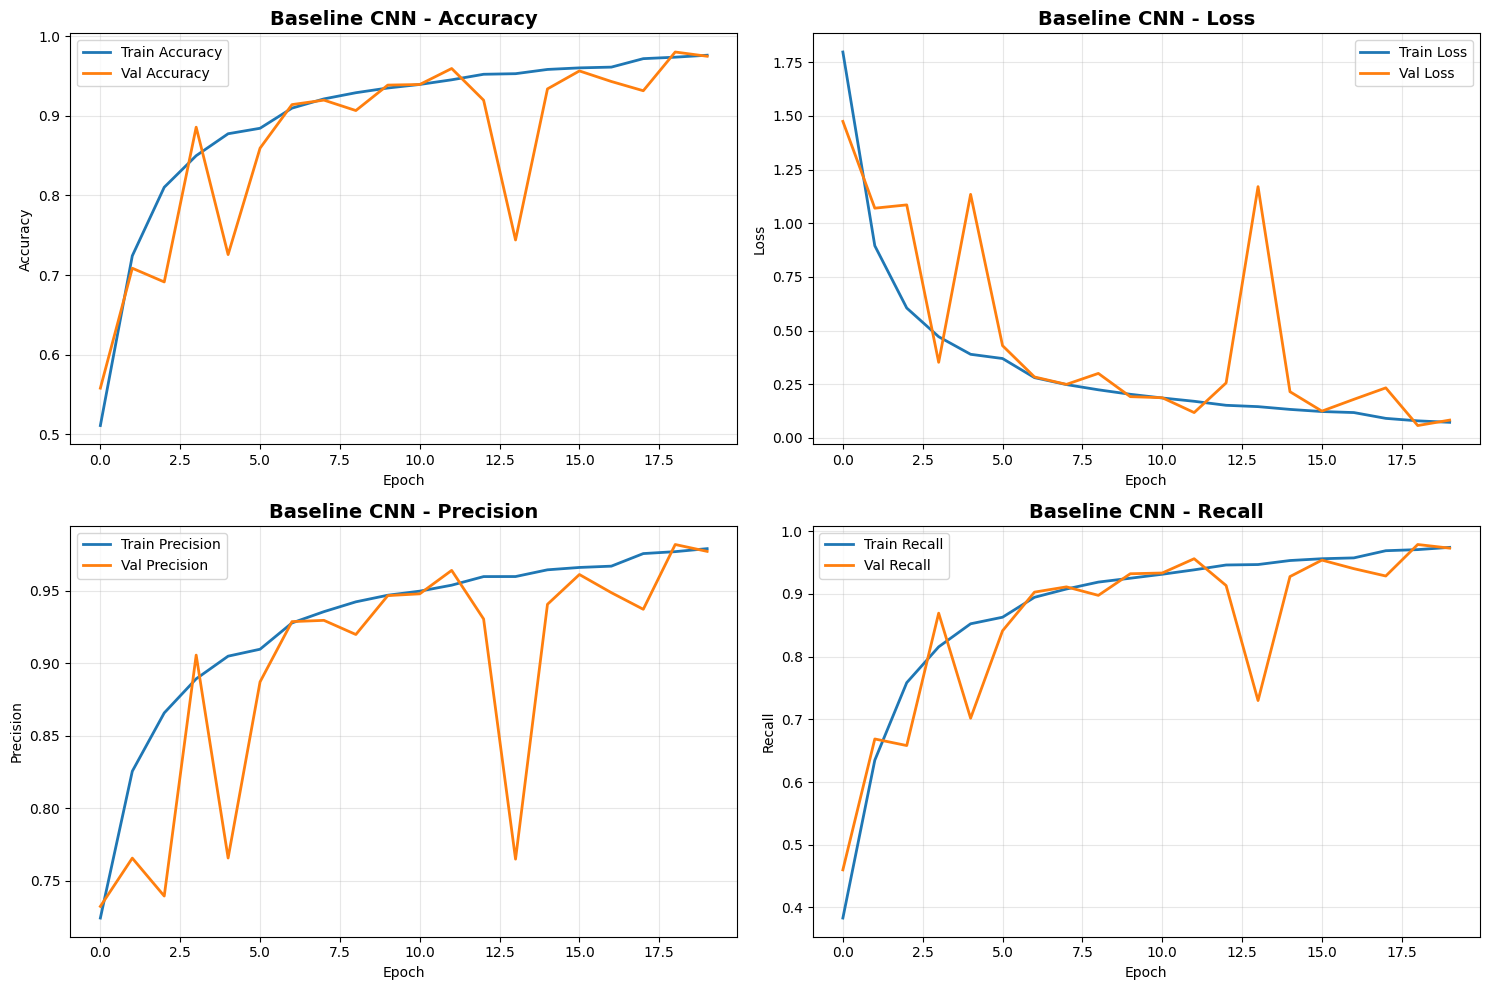


EVALUATING Baseline CNN

340/340 ━━━━━━━━━━━━━━━━━━━━ 118s 346ms/step - accuracy: 0.9873 - loss: 0.0418 - precision: 0.9886 - recall: 0.9863

📊 Final Metrics for Baseline CNN:
   Loss:      0.0562
   Accuracy:  0.9806
   Precision: 0.9825
   Recall:    0.9797
   F1-Score:  0.9811

 Baseline CNN evaluation completed and saved!


In [ ]:
# ===========================
# EVALUATE BASELINE CNN
# ===========================

# Plot training history
plot_training_history(baseline_history, 'Baseline CNN')

# Evaluate on validation set
baseline_results = evaluate_model(baseline_model, validation_generator, 'Baseline CNN')

# Save training history
np.save('models/baseline_cnn_history.npy', baseline_history.history)
print("\n Baseline CNN evaluation completed and saved!")

In [ ]:
# ===========================
# TRANSFER LEARNING ARCHITECTURE
# ===========================

def build_transfer_learning_model(base_model_name='MobileNetV2',
                                  input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                  num_classes=NUM_CLASSES,
                                  trainable_layers=0):
    """
    Build a transfer learning model

    Args:
        base_model_name: 'MobileNetV2'
        trainable_layers: Number of layers to unfreeze (0 = freeze all)
    """

    # Load pre-trained model
    if base_model_name == 'MobileNetV2':
        base_model = MobileNetV2(weights='imagenet',
                                include_top=False,
                                input_shape=input_shape)
    elif base_model_name == 'ResNet50':
        base_model = ResNet50(weights='imagenet',
                             include_top=False,
                             input_shape=input_shape)
    elif base_model_name == 'VGG16':
        base_model = VGG16(weights='imagenet',
                          include_top=False,
                          input_shape=input_shape)
    else:
        raise ValueError(f"Unknown model: {base_model_name}")

    # Freeze base model layers
    base_model.trainable = False

 
   # Build model
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

print(" Transfer learning architecture defined!")


 Transfer learning architecture defined!


In [ ]:
# ===========================
# BUILD AND COMPILE TRANSFER LEARNING MODEL
# ===========================

print("\n" + "="*60)
print("BUILDING TRANSFER LEARNING MODEL (MobileNetV2)")
print("="*60 + "\n")

transfer_model = build_transfer_learning_model(
    base_model_name='MobileNetV2',
    trainable_layers=0  # Freeze all base layers initially
)

# Compile model
transfer_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy',
            keras.metrics.Precision(name='precision'),
            keras.metrics.Recall(name='recall')]
)

print(transfer_model.summary())
print(f"\n📊 Model Statistics:")
print(f"   Total parameters: {transfer_model.count_params():,}")
print(f"   Trainable parameters: {sum([tf.size(w).numpy() for w in transfer_model.trainable_weights]):,}")
print(f"   Non-trainable parameters: {sum([tf.size(w).numpy() for w in transfer_model.non_trainable_weights]):,}")



BUILDING TRANSFER LEARNING MODEL (MobileNetV2)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,058,022 (11.67 MB)

 Trainable params: 798,502 (3.05 MB)

 Non-trainable params: 2,259,520 (8.62 MB)

None

📊 Model Statistics:
   Total parameters: 3,058,022
   Trainable parameters: 798,502
   Non-trainable parameters: 2,259,520


In [ ]:
# ===========================
# TRAIN TRANSFER LEARNING MODEL
# ===========================

print("\n" + "="*60)
print("TRAINING MOBILENETV2 TRANSFER LEARNING MODEL")
print("="*60 + "\n")

transfer_callbacks = get_callbacks('mobilenetv2_transfer')

transfer_history = transfer_model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=transfer_callbacks,
    verbose=1
)

print("\n MobileNetV2 transfer learning training completed!")


TRAINING MOBILENETV2 TRANSFER LEARNING MODEL

Epoch 1/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.7178 - loss: 1.0130 - precision: 0.8589 - recall: 0.6290
Epoch 1: val_accuracy improved from -inf to 0.88598, saving model to models/mobilenetv2_transfer_best.h5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 597s 429ms/step - accuracy: 0.7179 - loss: 1.0127 - precision: 0.8589 - recall: 0.6291 - val_accuracy: 0.8860 - val_loss: 0.3472 - val_precision: 0.9176 - val_recall: 0.8604 - learning_rate: 0.0010
Epoch 2/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.8691 - loss: 0.4073 - precision: 0.9059 - recall: 0.8377
Epoch 2: val_accuracy improved from 0.88598 to 0.91778, saving model to models/mobilenetv2_transfer_best.h5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 575s 424ms/step - accuracy: 0.8691 - loss: 0.4073 - precision: 0.9059 - recall: 0.8377 - val_accuracy: 0.9178 - val_loss: 0.2459 - val_precision: 0.9390 - val_recall: 0.9003 - learning_rate: 0.0010
Epoch 3/20
1358/1358 ━━━━━━━

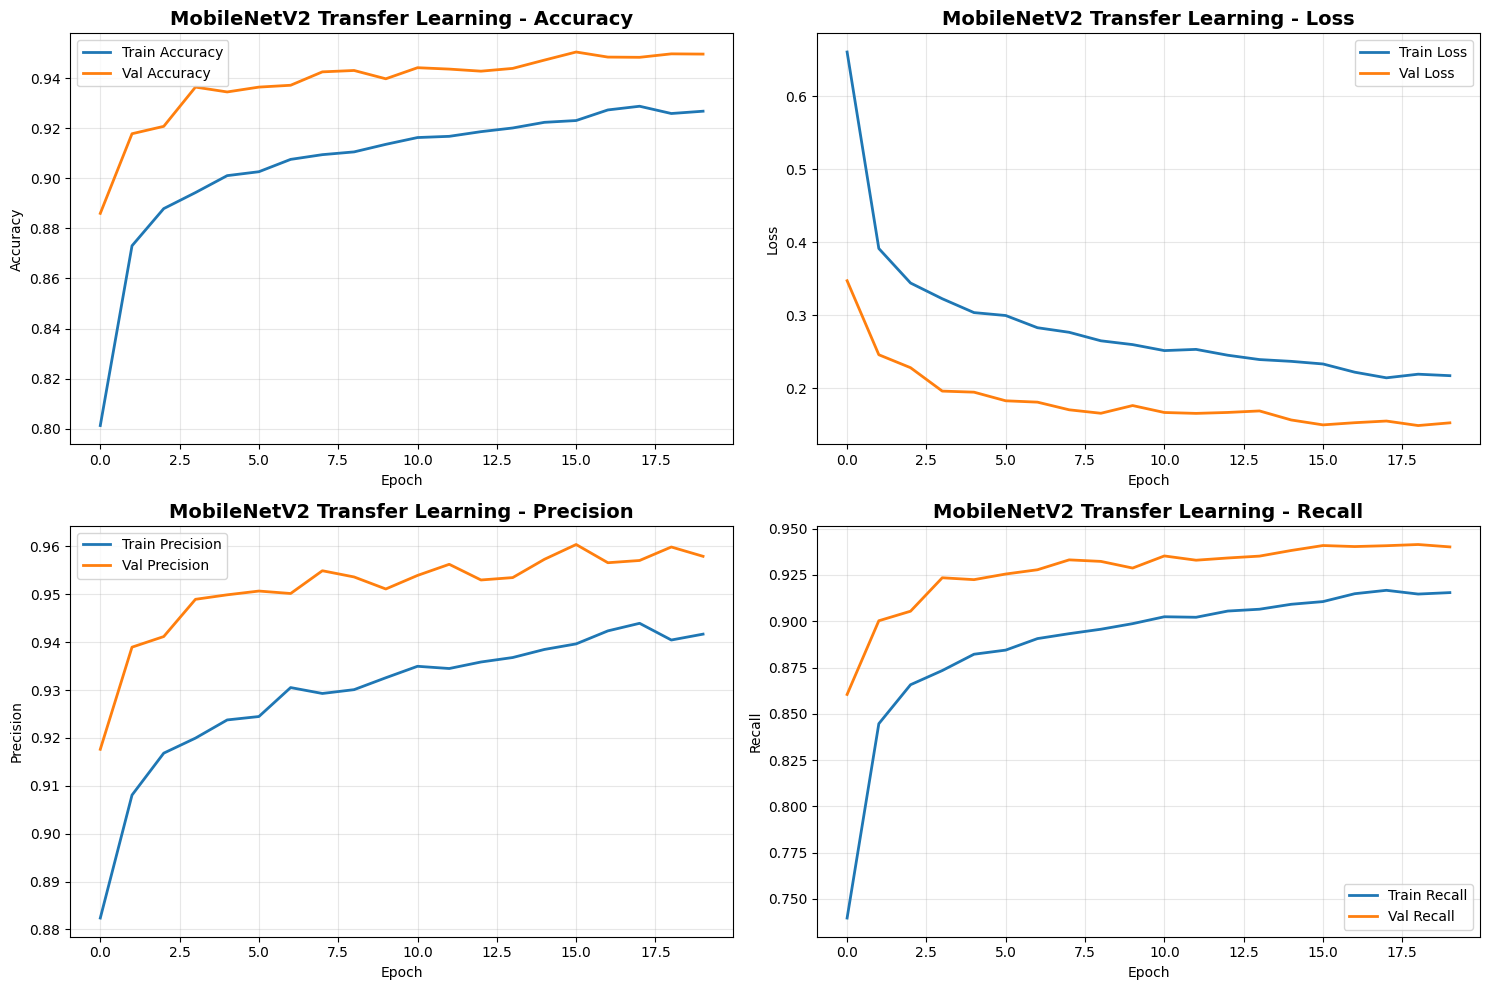


EVALUATING MobileNetV2 Transfer Learning

340/340 ━━━━━━━━━━━━━━━━━━━━ 114s 335ms/step - accuracy: 0.9600 - loss: 0.1114 - precision: 0.9669 - recall: 0.9549

📊 Final Metrics for MobileNetV2 Transfer Learning:
   Loss:      0.1440
   Accuracy:  0.9488
   Precision: 0.9591
   Recall:    0.9392
   F1-Score:  0.9490

 MobileNetV2 evaluation completed and saved!


In [33]:
# EVALUATE TRANSFER LEARNING MODEL
# ===========================

# Plot training history
plot_training_history(transfer_history, 'MobileNetV2 Transfer Learning')

# Evaluate on validation set
transfer_results = evaluate_model(transfer_model, validation_generator, 'MobileNetV2 Transfer Learning')

# Save training history
np.save('models/mobilenetv2_transfer_history.npy', transfer_history.history)
print("\n MobileNetV2 evaluation completed and saved!")


MODEL COMPARISON

📊 FINAL COMPARISON:

Metric                    Baseline CNN         MobileNetV2          Improvement
--------------------------------------------------------------------------------
Best Val Accuracy         0.9803               0.9504               -2.99%
Best Val Loss             0.0579               0.1490               -9.11%
Final Val Precision       0.9825               0.9591               -2.35%
Final Val Recall          0.9797               0.9392               -4.06%


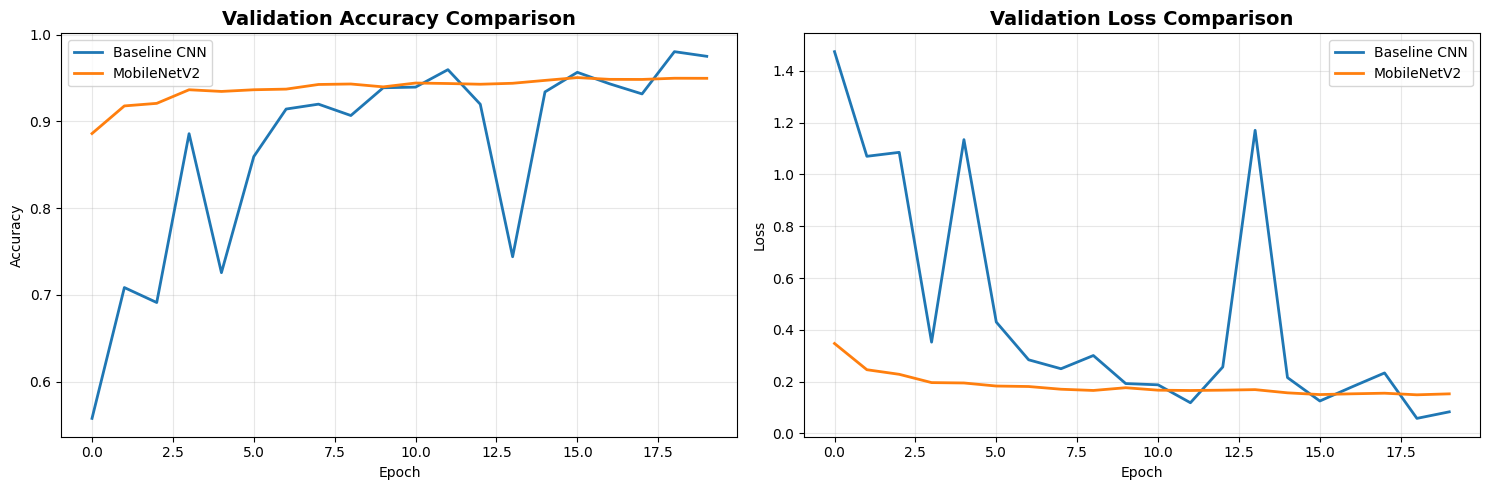


 Model comparison completed!


In [ ]:
# ===========================
# COMPARE BOTH MODELS
# ===========================

print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60 + "\n")

# Get best metrics
baseline_acc = max(baseline_history.history['val_accuracy'])
transfer_acc = max(transfer_history.history['val_accuracy'])

baseline_loss = min(baseline_history.history['val_loss'])
transfer_loss = min(transfer_history.history['val_loss'])

# Print comparison
print("📊 FINAL COMPARISON:")
print(f"\n{'Metric':<25} {'Baseline CNN':<20} {'MobileNetV2':<20} {'Improvement'}")
print("-" * 80)
print(f"{'Best Val Accuracy':<25} {baseline_acc:<20.4f} {transfer_acc:<20.4f} {(transfer_acc - baseline_acc)*100:+.2f}%")
print(f"{'Best Val Loss':<25} {baseline_loss:<20.4f} {transfer_loss:<20.4f} {(baseline_loss - transfer_loss)*100:+.2f}%")
print(f"{'Final Val Precision':<25} {baseline_results[2]:<20.4f} {transfer_results[2]:<20.4f} {(transfer_results[2] - baseline_results[2])*100:+.2f}%")
print(f"{'Final Val Recall':<25} {baseline_results[3]:<20.4f} {transfer_results[3]:<20.4f} {(transfer_results[3] - baseline_results[3])*100:+.2f}%")

# Side-by-side comparison plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(baseline_history.history['val_accuracy'], label='Baseline CNN', linewidth=2)
axes[0].plot(transfer_history.history['val_accuracy'], label='MobileNetV2', linewidth=2)
axes[0].set_title('Validation Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(baseline_history.history['val_loss'], label='Baseline CNN', linewidth=2)
axes[1].plot(transfer_history.history['val_loss'], label='MobileNetV2', linewidth=2)
axes[1].set_title('Validation Loss Comparison', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Model comparison completed!")

In [ ]:
# ===========================
#  SAVE MODEL COMPARISON REPORT
# ===========================

# Create comparison report
report = f"""
PLANT DISEASE CLASSIFICATION - MODEL COMPARISON REPORT
{'='*60}

Dataset: PlantVillage
Classes: {NUM_CLASSES}
Image Size: {IMG_SIZE}x{IMG_SIZE}
Epochs: {EPOCHS}
Batch Size: {BATCH_SIZE}

BASELINE CNN
------------
Architecture: Custom 4-block CNN
Total Parameters: {baseline_model.count_params():,}
Best Validation Accuracy: {baseline_acc:.4f}
Best Validation Loss: {baseline_loss:.4f}
Final Precision: {baseline_results[2]:.4f}
Final Recall: {baseline_results[3]:.4f}

MOBILENETV2 TRANSFER LEARNING
------------------------------
Architecture: MobileNetV2 (ImageNet) + Custom Head
Total Parameters: {transfer_model.count_params():,}
Trainable Parameters: {sum([tf.size(w).numpy() for w in transfer_model.trainable_weights]):,}
Best Validation Accuracy: {transfer_acc:.4f}
Best Validation Loss: {transfer_loss:.4f}
Final Precision: {transfer_results[2]:.4f}
Final Recall: {transfer_results[3]:.4f}

IMPROVEMENT
-----------
Accuracy: {(transfer_acc - baseline_acc)*100:+.2f}%
Loss: {(baseline_loss - transfer_loss)*100:+.2f}%
Precision: {(transfer_results[2] - baseline_results[2])*100:+.2f}%
Recall: {(transfer_results[3] - baseline_results[3])*100:+.2f}%

RECOMMENDATION
--------------
{'MobileNetV2 Transfer Learning performs better!' if transfer_acc > baseline_acc else 'Baseline CNN performs better!'}
"""

# Save report
with open('models/comparison_report.txt', 'w') as f:
    f.write(report)

print(report)
print("\n Report saved to 'models/comparison_report.txt'")


PLANT DISEASE CLASSIFICATION - MODEL COMPARISON REPORT

Dataset: PlantVillage
Classes: 38
Image Size: 224x224
Epochs: 20
Batch Size: 32

BASELINE CNN
------------
Architecture: Custom 4-block CNN
Total Parameters: 27,010,886
Best Validation Accuracy: 0.9803
Best Validation Loss: 0.0579
Final Precision: 0.9825
Final Recall: 0.9797

MOBILENETV2 TRANSFER LEARNING
------------------------------
Architecture: MobileNetV2 (ImageNet) + Custom Head
Total Parameters: 3,058,022
Trainable Parameters: 798,502
Best Validation Accuracy: 0.9504
Best Validation Loss: 0.1490
Final Precision: 0.9591
Final Recall: 0.9392

IMPROVEMENT
-----------
Accuracy: -2.99%
Loss: -9.11%
Precision: -2.35%
Recall: -4.06%

RECOMMENDATION
--------------
Baseline CNN performs better!


 Report saved to 'models/comparison_report.txt'
